In [42]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb    
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error


In [43]:
data = make_regression(n_samples= 1000, n_features= 6, n_targets= 1)

In [44]:
x = data[0]
y = data[1]

In [45]:
df = pd.DataFrame(x, columns = ['feature_1','feature_2','feature_3','feature_4','feature_5','feature_6'])
df['target'] = y
df



,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,target
0,1.165899,-0.606136,0.414457,-0.255129,0.416520,0.434701,117.244464
1,1.078079,-0.341588,0.253051,0.055265,0.851588,0.672402,138.325594
2,0.865262,-0.845513,1.811564,-0.084393,-1.471582,0.269030,168.751103
3,1.948381,-0.154576,-1.343441,0.207023,0.065668,-0.142408,69.853653
4,1.019477,0.360137,1.218376,1.285108,-0.423969,1.349641,307.490257
...,...,...,...,...,...,...,...
995,-0.869339,0.224322,-0.413670,-0.463457,0.213996,0.015270,-134.378653
996,0.248848,-0.997041,-0.020509,0.030275,1.184590,-0.997740,-7.386881
997,-2.204392,0.065796,0.272867,0.003853,0.383078,-1.024730,-183.158900
998,0.499542,0.578354,-0.096814,-1.348914,-1.098449,-2.410762,-40.840604


In [46]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,target
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.016690,-0.034611,0.000127,-0.020207,-0.000621,-0.012584,-4.894799
std,0.967035,0.970819,1.018119,1.000976,1.008787,1.009895,156.235488
min,-3.128524,-3.421252,-3.337501,-3.202857,-3.052571,-2.970758,-481.008078
25%,-0.680183,-0.742895,-0.658649,-0.689960,-0.615639,-0.687814,-109.186770
50%,0.032257,-0.011170,0.012415,-0.022061,-0.025972,0.009963,-6.217654
75%,0.632955,0.672260,0.699615,0.700129,0.678364,0.668260,115.357820
max,2.893397,2.755508,3.071835,4.612353,3.014972,3.228926,457.506932


In [47]:
x = df.drop('target', axis = 1)
y = df['target']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3)

In [49]:

linear_model = LinearRegression()
linear_model_predictions = {}

for feature in x.columns:
    x_feature = x[[feature]].values
    linear_model.fit(x_feature, y)
    linear_model_predictions[feature] = linear_model.predict(x_feature)
    

In [50]:
linear_model_predictions.keys()

dict_keys(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6'])

In [51]:
linear_model_predictions['feature_1']

array([ 1.05495578e+02,  9.72979106e+01,  7.74321992e+01,  1.78537458e+02,
        9.18276318e+01, -3.32302380e+01,  1.87037461e+02,  3.65660840e+01,
       -7.46632937e+01, -9.24917897e+01,  4.99962031e+01, -2.89058245e+01,
       -1.45370704e+02, -1.57554133e+02, -2.06914065e+02, -6.68639306e+01,
       -4.64780942e+01,  1.30768669e+01, -1.02683423e+02,  4.49852745e+01,
        9.77146554e+01,  7.73389350e+00, -2.70221749e+01, -6.11812460e+01,
       -4.38617161e+01, -3.69465386e+01, -5.82026720e+01, -2.44847682e+01,
        2.02880847e+02, -3.88424408e+01,  3.93072238e+01, -2.86290290e+00,
       -4.59169430e+01,  8.19329976e+01,  8.67606586e+01, -1.95532353e+02,
       -1.34630059e+02, -2.99394243e+01, -1.13185111e+02,  9.47798252e+01,
       -1.51477369e+01, -1.72161157e+02, -1.57653222e+01, -1.24752579e+01,
       -6.36712138e+01, -4.69069444e+01, -3.18111896e+01,  7.79086456e+01,
       -2.72480599e+01,  1.17423471e+02, -1.21864471e+02,  1.59451635e+02,
        5.59673436e+01,  

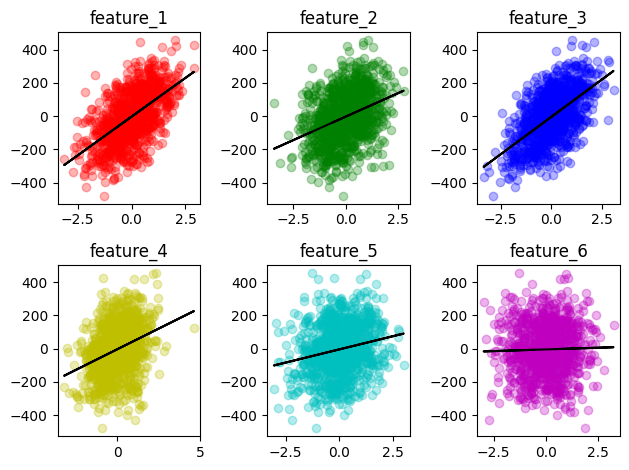

In [52]:
for n, feature in enumerate(x.columns):
    c = ['r','g','b','y','c','m']
    plt.subplot(2, 3, n+1)
    plt.scatter(x[feature], y, label = feature, c=c[n], alpha = 0.3)
    plt.plot(x[feature],linear_model_predictions[feature], c='black')
    plt.title(feature)
    plt.tight_layout()
plt.show()

In [53]:
kf = KFold(n_splits=5, random_state= 54, shuffle=True)

cv = cross_val_score(linear_model, x, y, cv= kf, scoring='neg_mean_squared_error')


In [54]:
cv.sort()
cv

array([-2.21958014e-25, -1.53530673e-26, -5.75894099e-27, -4.27103124e-27,
       -2.73225130e-27])

In [55]:
np.mean(cv)

-5.001466102022528e-26

## Ridge implementation

In [56]:
ridge_model = Ridge(alpha=1.0)

ridge_model_predictions = {}

for feature in x.columns:
    x_feature = x[[feature]].values
    ridge_model.fit(x_feature, y)
    ridge_model_predictions[feature] = linear_model.predict(x_feature)
    


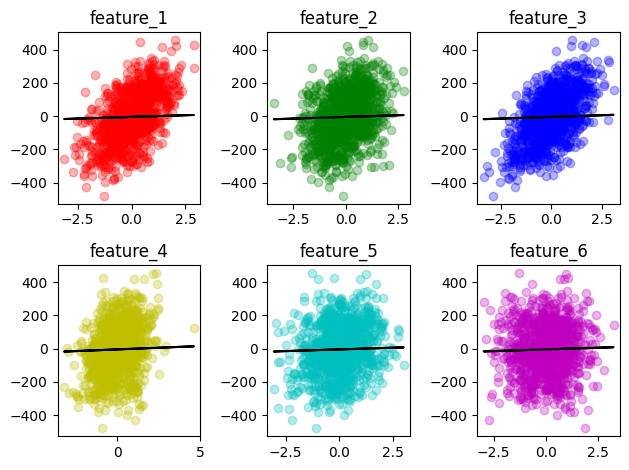

In [57]:
for n, feature in enumerate(x.columns):
    c = ['r','g','b','y','c','m']
    plt.subplot(2, 3, n+1)
    plt.scatter(x[feature], y, label = feature, c=c[n], alpha = 0.3)
    plt.plot(x[feature],ridge_model_predictions[feature], c='black')
    plt.title(feature)
    plt.tight_layout()
plt.show()

In [58]:
kf = KFold(n_splits=5, random_state= 54, shuffle=True)

cv = cross_val_score(ridge_model, x, y, cv= kf, scoring='neg_mean_squared_error')

cv.sort()
np.mean(cv)


-0.04558051640727708

In [59]:
param_grid = {
    
    'ridge': {'alpha': [0, 1, 2, 3, 4]},
    'lasso': {'alpha': [0.0,0.1, 0.2, 0.3, 0.4]}
     
}
cv = GridSearchCV(ridge_model, param_grid= param_grid['ridge'] ,cv = 5, scoring='neg_mean_squared_error')
cv.fit(x, y)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0, 1, 2, 3, 4]},
             scoring='neg_mean_squared_error')

In [60]:
cv.best_estimator_

Ridge(alpha=0)

In [61]:
cv.best_score_

-4.680449616445402e-27

In [62]:
param_grid = {
    
    'ridge': {'alpha': [0, 1, 2, 3, 4]},
    'lasso': {'alpha': [0.0,0.1, 0.2, 0.3, 0.4]}
     
}
cv = GridSearchCV(ridge_model, param_grid= param_grid['lasso'] ,cv = 5, scoring='neg_mean_squared_error')
cv.fit(x, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0, 0.1, 0.2, 0.3, 0.4]},
             scoring='neg_mean_squared_error')

In [63]:
cv.best_score_

-4.680449616445402e-27